In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path



## Zielwert ZQ Synergy

#### Vorschlag Oktober 2021
$PE(GFZ)= min( 1,63*(\frac{35.2}{GFZ+0,15}-27.3) ; 100) $     $[kWh_{PE}/m²_{BGF}a]$

### Letztstand (23.11.2021)
Bezogen auf BGF:
$PE(GFZ)= min( \frac{30.4}{GFZ+0,15}-26.4) ; 100)  kWh_{PE}/m²_{BGF}a$

Bezogen auf NGF:
$PE(GFZ)= min( \frac{38}{GFZ+0,15}-33) ; 125) kWh_{PE}/m²_{NGF}a$


In [16]:
# ZQ Austria Vorschlag

GFZ = np.linspace(0.0, 8, 500) #min, max, steps
from peexcel.utils.targets import Zielwert

Text(0, 0.5, 'PE-Balance $[{kWh/m²_{NGF}a}]$')

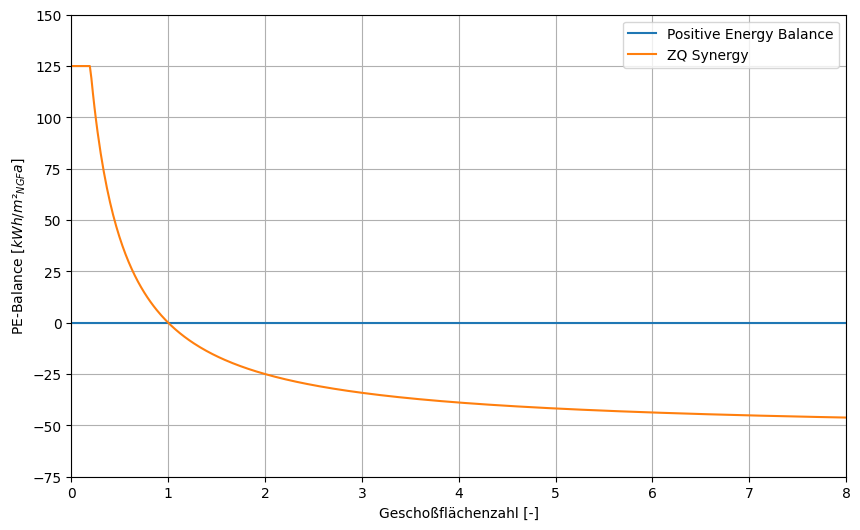

In [17]:
PEQ_alfa_NGF = pd.DataFrame({
    "Positive Energy Balance":np.zeros(len(GFZ)),
    "ZQ Synergy": Zielwert.ZQSynergy().alpha(GFZ),
    # "ZQ Synergy (Vorschlag Simon I 21.11.)": target(GFZ, dx=0.18, EUI=30),
    # "ZQ Synergy (Vorschlag Simon II 21.11.)": target(GFZ, dx=0.25, A=40, EUI=30),
}, index=GFZ)

PEQ_alfa = PEQ_alfa_NGF * 0.8


from peexcel.utils.plotting import target_of_gfz, plot_context_factor
fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=PEQ_alfa_NGF)
ax.set_ylabel("PE-Balance $[{kWh/m²_{NGF}a}]$")


In [18]:
PEQ_alfa_NGF


,Positive Energy Balance,ZQ Synergy
0.000000,0.0,125.000000
0.016032,0.0,125.000000
0.032064,0.0,125.000000
0.048096,0.0,125.000000
0.064128,0.0,125.000000
...,...,...
7.935872,0.0,-46.129725
7.951904,0.0,-46.144883
7.967936,0.0,-46.159982
7.983968,0.0,-46.175020


In [19]:
# get Varianten excel from nextcloud
import peexcel.utils.nextcloud


nc_path = r"EE\1_Forschung\2_Laufend\Plusenergie-Campus Energybase 2.0 (Sdz 9)\4_Quartier\PEExcel_final\PEC Varianten.xlsx"
path = Path(nc_path)
excel = peexcel.utils.nextcloud.get(path)
df = pd.read_excel(excel)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Columns: 414 entries, Name to Heiz/Kühl-Saldo
dtypes: bool(12), float64(291), int64(86), object(25)
memory usage: 3.4+ MB


Identify the required columns

In [20]:
print(df.columns)

Index(['Name', 'Quartier', 'depth', 'Linie', 'Forschungsprojekt', 'Land',
       'Stadt', 'Variante', 'Mikroquartier', 'Generation',
       ...
       'PE-Saldo Ziel Real Dichte [kWh/m²BGF]',
       'PE-Saldo Zielwert Mobilität [kWh/m²NGF]', 'CO2 Wert Person t/a',
       'CO2 Wert kg/m2', 'Heizenergie [MWh/a]', 'Kühlenergie [MWh/a]',
       'Umweltenergiepotential Freifläche [MWh/a]',
       'Umweltenergiepotential Innenhof [MWh/a]',
       'Umweltenergiepotential Straße/Gehweg [MWh/a]', 'Heiz/Kühl-Saldo'],
      dtype='object', length=414)


In [21]:
available = set(df.columns)

PEB_varname = "Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa]2"
PEB_Zielwert_varname = "PE-Saldo Ziel NGF [kWh/m²NGFa]2"
GFZ_varname = "GFZ [-]"

required = {
    "Name",

    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima",

    GFZ_varname,
    PEB_varname,
    PEB_Zielwert_varname,
    'Heizenergie [MWh/a]',
    'Kühlenergie [MWh/a]',
    # 'Umweltenergiepotential auf Grundstück [MWh/a]',

}
missing = required - available
print("missing columns:")
for miss in missing:
    print(miss)


missing columns:
PE-Saldo Ziel NGF [kWh/m²NGFa]2
JAZ
Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa]2
Lüftung mit WRG
Reduktion Nutzerstrom


In [22]:
for c in df.columns:
    if "PE" in c:
        print(c)

CO2,PE Profil
Fernwärme PE-Faktor
PEBedarf_Erdgas
PEExport_Erdgas
PESaldo_Erdgas
Alpha - PE-Saldo ohne Dichteausgleich [kWh/m²NGF]_Erdgas
Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF]_Erdgas
Alpha -PE-Saldo mit Dichteausgleich [kWh/m²BGF]_Erdgas
PE-Bilanz Beta [kWh/m²NGF]_Erdgas
PE-Bilanz Beta [kWh/m²BGF]_Erdgas
PEBedarf_Fernwaerme
PEExport_Fernwaerme
PESaldo_Fernwaerme
Alpha - PE-Saldo ohne Dichteausgleich [kWh/m²NGF]_Fernwaerme
Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF]_Fernwaerme
Alpha -PE-Saldo mit Dichteausgleich [kWh/m²BGF]_Fernwaerme
PE-Bilanz Beta [kWh/m²NGF]_Fernwaerme
PE-Bilanz Beta [kWh/m²BGF]_Fernwaerme
PEBedarf_WPohneDSM
PEExport_WPohneDSM
PESaldo_WPohneDSM
Alpha - PE-Saldo ohne Dichteausgleich [kWh/m²NGF]__WPohneDSM
Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF]_WPohneDSM
Alpha -PE-Saldo mit Dichteausgleich [kWh/m²BGF]_WPohneDSM
PE-Bilanz Beta [kWh/m²NGF]_WPohneDSM
PE-Bilanz Beta [kWh/m²BGF]_WPohneDSM
Projektkennwert PEBedarf_WPmitDSM
Projektkennwert PEExport_W

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 1110 and the vector passed to `x` has length 500.

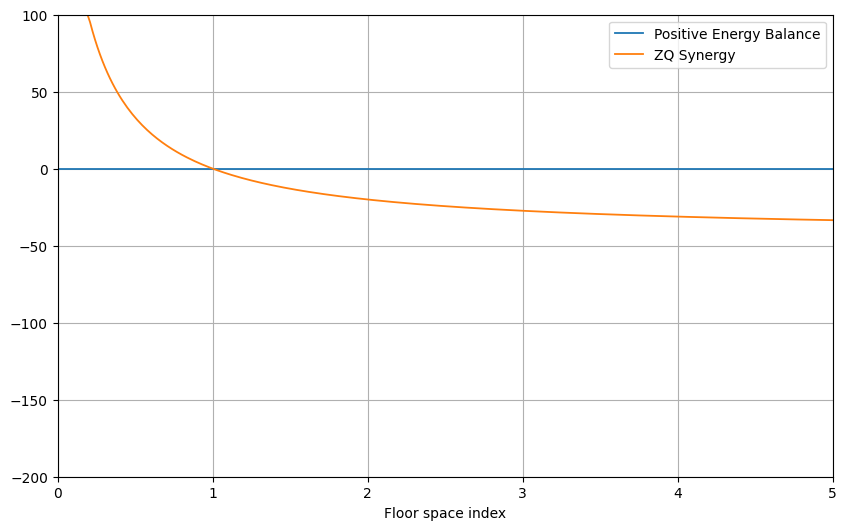

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa, ylims=(-200,100))
sns.set_palette("Set2") #"Reds"
sns.scatterplot(ax=ax,
                x=GFZ,
                y=PEB_varname,
                hue="Mikroquartier",
                data=df)

In [ ]:
subplot_columns = [
    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima"]

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    plot_context_factor(ax,
                        df=PEQ_alfa,
                        ylims=(-200,100),
                        xlims=(1.5,3),
                        no_legend=True
                        )
    sns.scatterplot(ax=ax,
                    x=GFZ_varname,
                    y=PEB_varname,
                    hue=category,
                    data=df)
plt.tight_layout()

In [ ]:
dfmin = df[required]
dfmin.columns


In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    sns.boxplot(ax=ax, data=dfmin,
                x=PEB_varname, y="Mikroquartier",
                whis=[0, 100], width=.8, linewidth=0.6
                )

    sns.stripplot(ax=ax, x=PEB_varname, y="Mikroquartier",
              data=dfmin, hue=category, color="orange",
              size=4, linewidth=0)

    sns.stripplot(ax=ax, x=PEB_Zielwert_varname, y="Mikroquartier",
              data=dfmin, color="red",
              size=5, linewidth=0)
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(20,15), sharex=True, sharey=True)
for ax, mqs in zip(axes.flatten(), dfmin.Mikroquartier.unique()):
    ax.plot(np.arange(len(dfmin[dfmin.Mikroquartier==mqs])), PEB_varname,
    data=dfmin[dfmin.Mikroquartier==mqs], linestyle='-', marker='o')


In [ ]:
b1 = dfmin[dfmin.Mikroquartier=="Blockrand 1"]
mq_count = 2 #dfmin.Mikroquartier.unique()
cat_count = len(subplot_columns[:3])

fig, axes = plt.subplots(mq_count,cat_count, figsize=(20,15))
for axcol, cat in enumerate(subplot_columns[:3]):
    sns.catplot(ax=axes[0, axcol],
                x=cat,
                y=PEB_varname,
                order=b1[cat].unique(),
                data=b1)
